In [19]:
import csv
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
# 决策树可视化
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()].reshape(xx.shape))
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

clf: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


ValueError: cannot reshape array of size 80000 into shape (200,200)

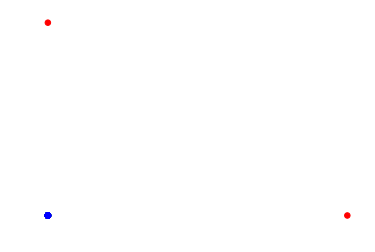

In [25]:
def trainDicisionTree(csv_url):
    feature_list = []
    label_list = []
    
    # 读取csv文件
    with open(csv_url) as csv_data:
        reader = csv.reader(csv_data)
        headers = next(reader)
    
        # 存储特征数列和目标数列
        for row in reader:
            label_list.append(row[len(row) - 1])
            row_dict = {}
            for i in range(1, len(row) - 1):
                row_dict[headers[i]] = row[i]
            feature_list.append(row_dict)

        # 将特征数值化
        vec = DictVectorizer()
        dummyX = vec.fit_transform(feature_list).toarray()
        
        # 将标签二值化
        label = preprocessing.LabelBinarizer()
        dummyY = label.fit_transform(label_list)

        # 使用决策树分类预测
        clf = tree.DecisionTreeClassifier(criterion='gini')
        clf = clf.fit(dummyX, dummyY)
        print('clf:', clf)
        
        visualize_classifier(tree.DecisionTreeClassifier(), dummyX, dummyY)
        
trainDicisionTree('iris.csv')